In [101]:
from scipy.fftpack import fft, dct , idct
import cv2 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
import pywt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr

## Q3

In [120]:
img=cv2.imread('4.jpg',cv2.IMREAD_GRAYSCALE)
img_real=cv2.imread('real_4.jpg',cv2.IMREAD_GRAYSCALE)

In [121]:
DCT=dct(dct(img.T, norm='ortho').T, norm='ortho')

In [122]:

Filter = np.ones((img.shape[0],img.shape[1]))
Filter[30:110,250:320]=0
Filter[90:160,550:600]=0
DCT_filter = DCT * Filter

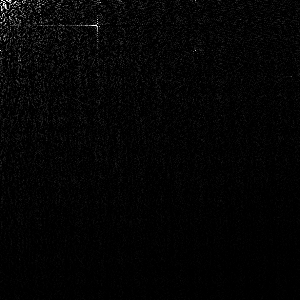

In [141]:

cv2_imshow(cv2.resize(DCT,(300,300)))


In [123]:
inverse_DCT=idct(idct(image_dct.T, norm='ortho').T, norm='ortho')

mse: 70.7796587478351
psnr: 29.631718964388277
ssim 0.8422567217559044


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  This is separate from the ipykernel package so we can avoid doing imports until


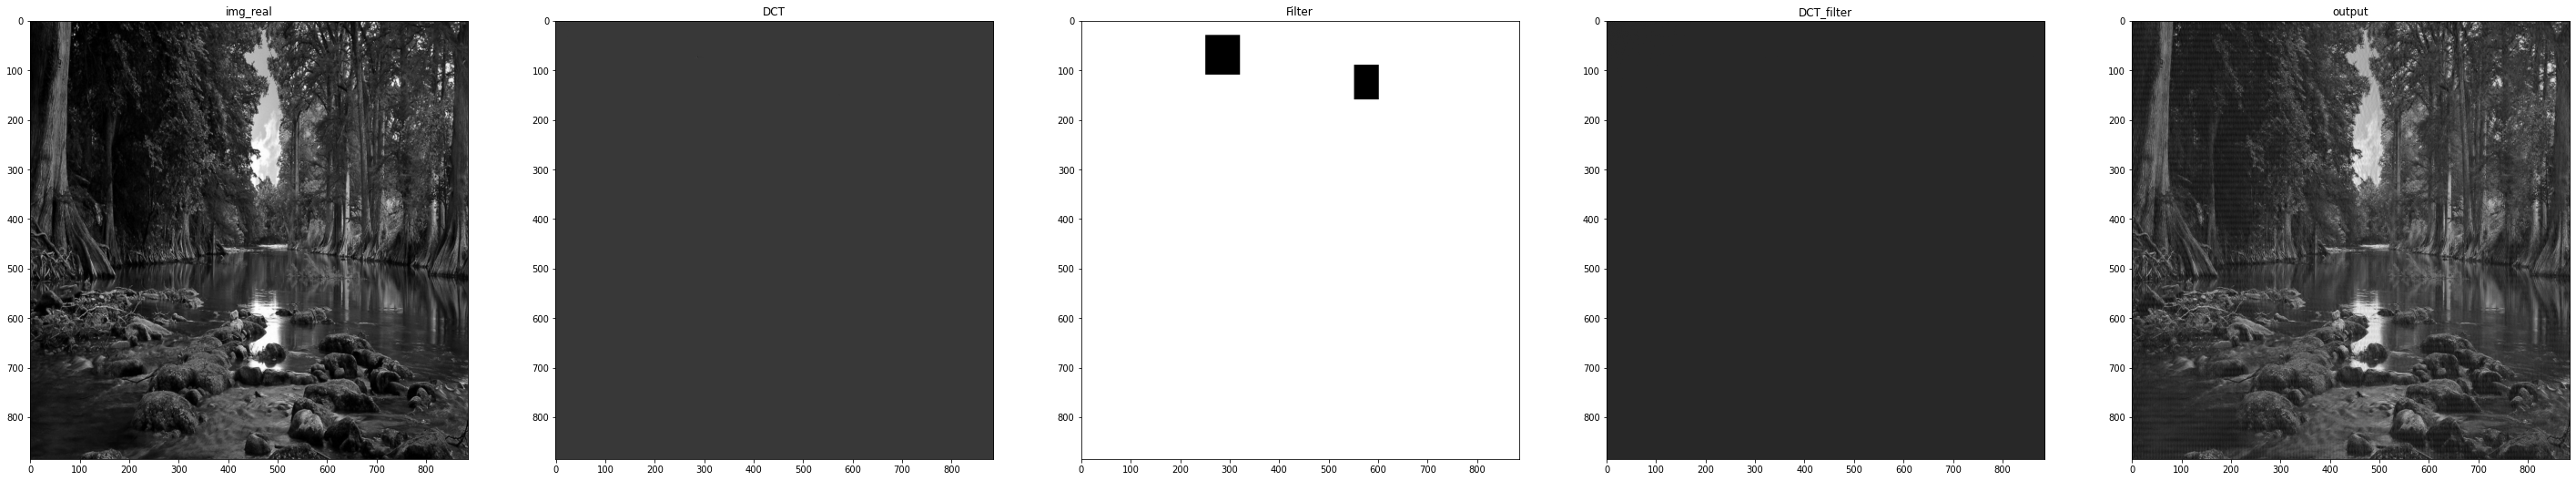

In [134]:
print('mse:',mse(img_real,inverse_DCT))
print('psnr:',psnr(img_real,inverse_DCT))
print('ssim',ssim(img_real,inverse_DCT))
#cv2_imshow(inverse_DCT)
plt.figure(figsize=(50, 50))
plt.subplot(1,5,1),plt.imshow(img_real, cmap=plt.cm.gray),plt.title('img_real')
plt.subplot(1,5,2),plt.imshow(DCT, cmap=plt.cm.gray),plt.title('DCT')
plt.subplot(1,5,3),plt.imshow(Filter, cmap=plt.cm.gray),plt.title('Filter')
plt.subplot(1,5,4),plt.imshow(DCT_filter, cmap=plt.cm.gray),plt.title('DCT_filter')
plt.subplot(1,5,5),plt.imshow(inverse_DCT, cmap=plt.cm.gray),plt.title('output')
plt.show()


/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


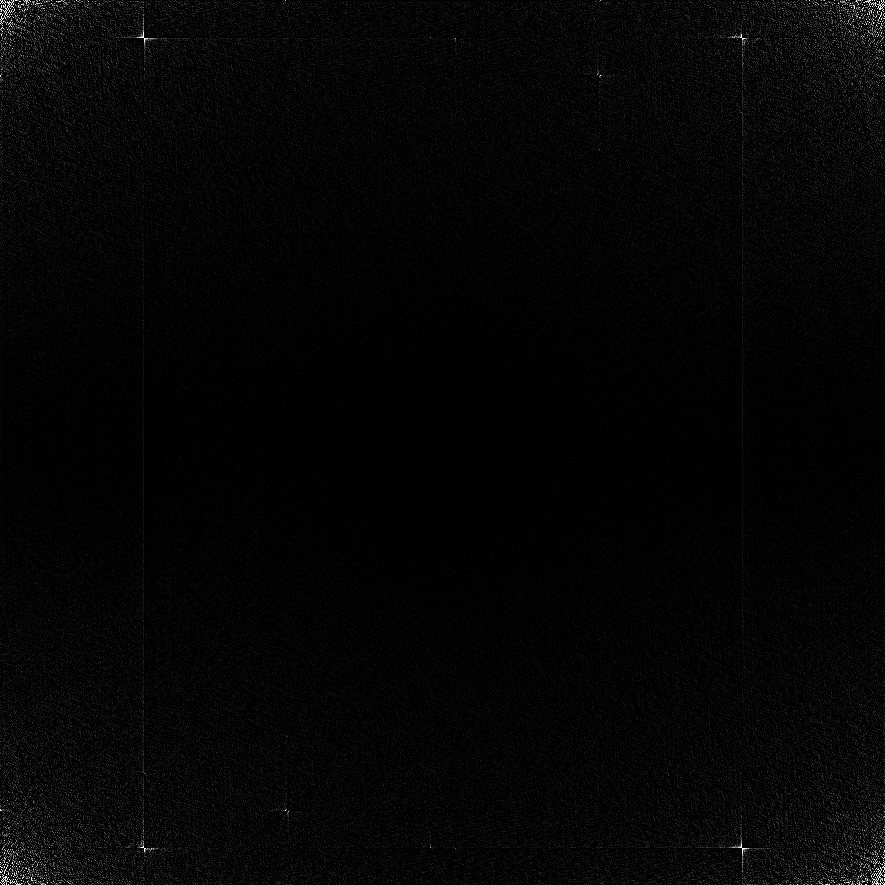

In [142]:
DFT=np.fft.fft2(img,norm='ortho')
cv2_imshow(DFT)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


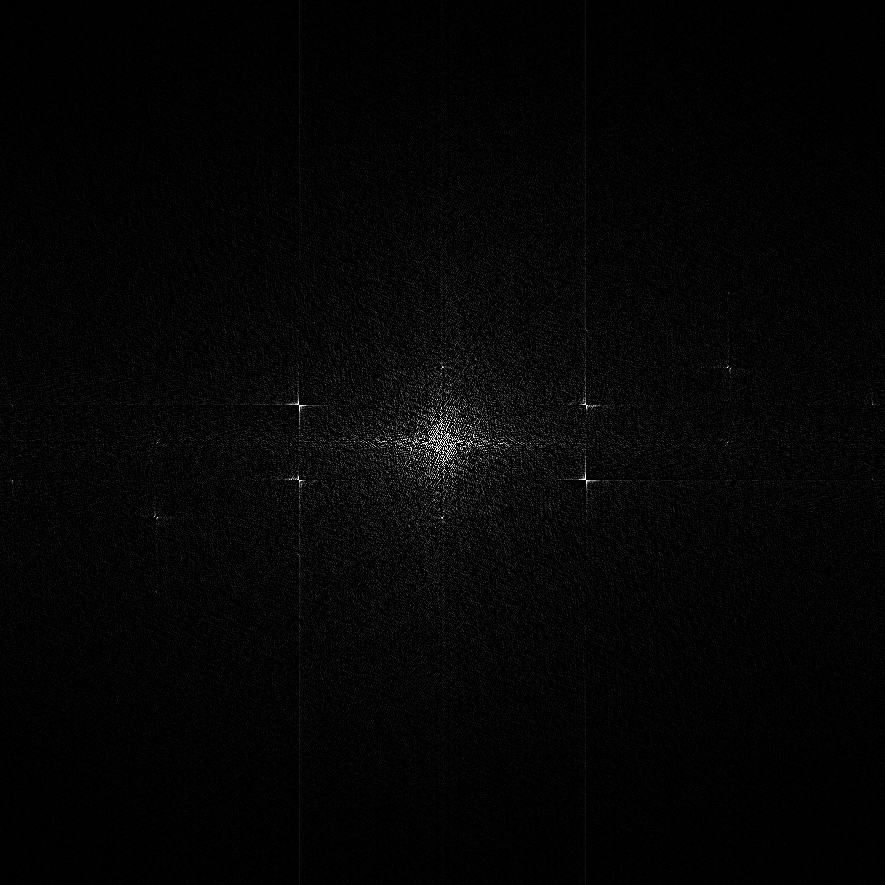

In [153]:
DFT_shift=np.fft.fftshift(DFT)
cv2_imshow(DFT_shift)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


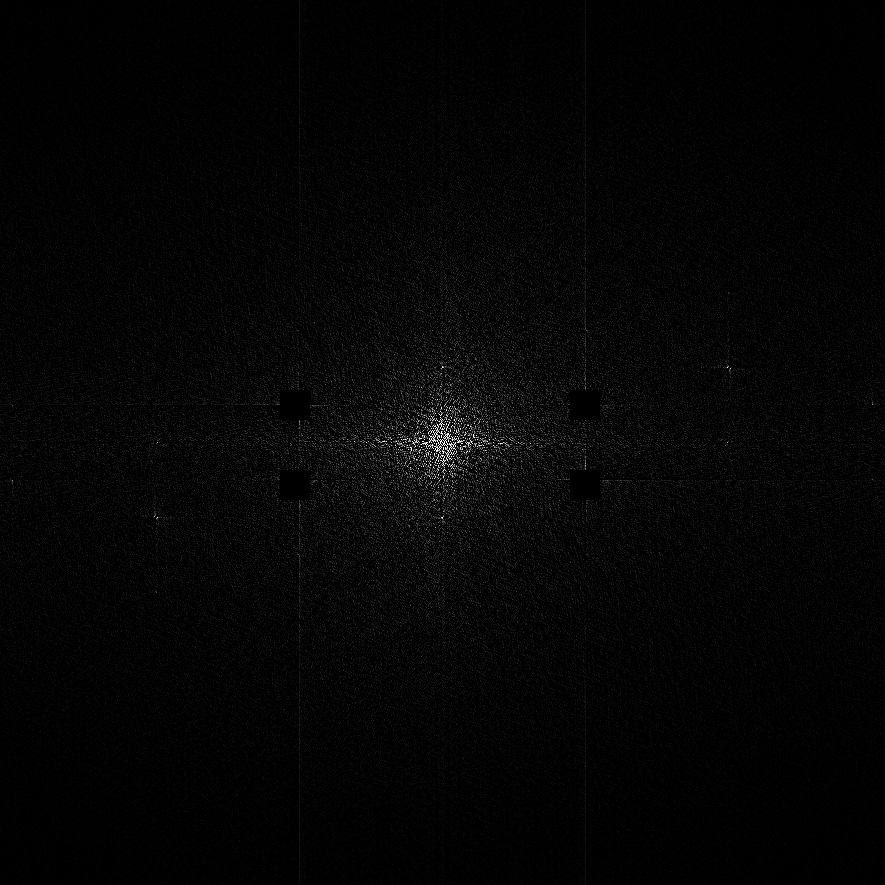

In [154]:
Filter_DFT = np.ones((img.shape[0],img.shape[1]))
Filter_DFT[390:420,280:310]=0
Filter_DFT[390:420,570:600]=0
Filter_DFT[470:500,280:310]=0
Filter_DFT[470:500,570:600]=0

Image_DFT_filter = DFT_shift * Filter_DFT
cv2_imshow(Image_DFT_filter)

In [145]:
DFT_ishift=np.fft.ifftshift(Image_DFT_filter)

In [146]:
inverse_DFT=np.fft.ifft2(DFT_ishift,norm='ortho')

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


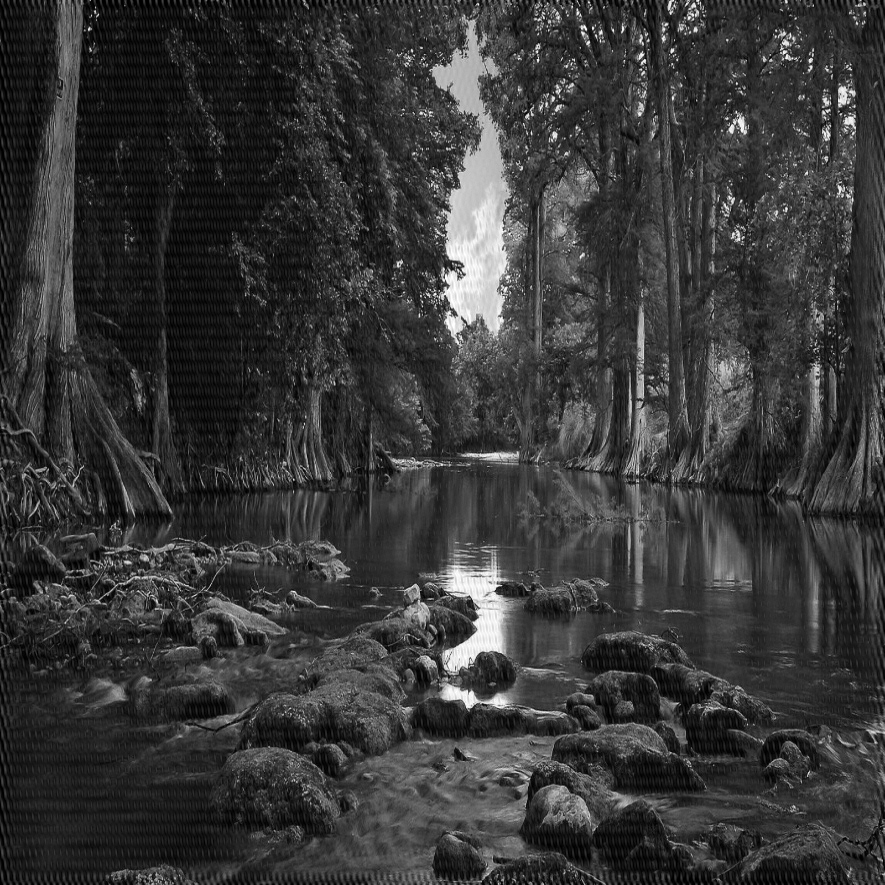

In [155]:
cv2_imshow(inverse_DFT)

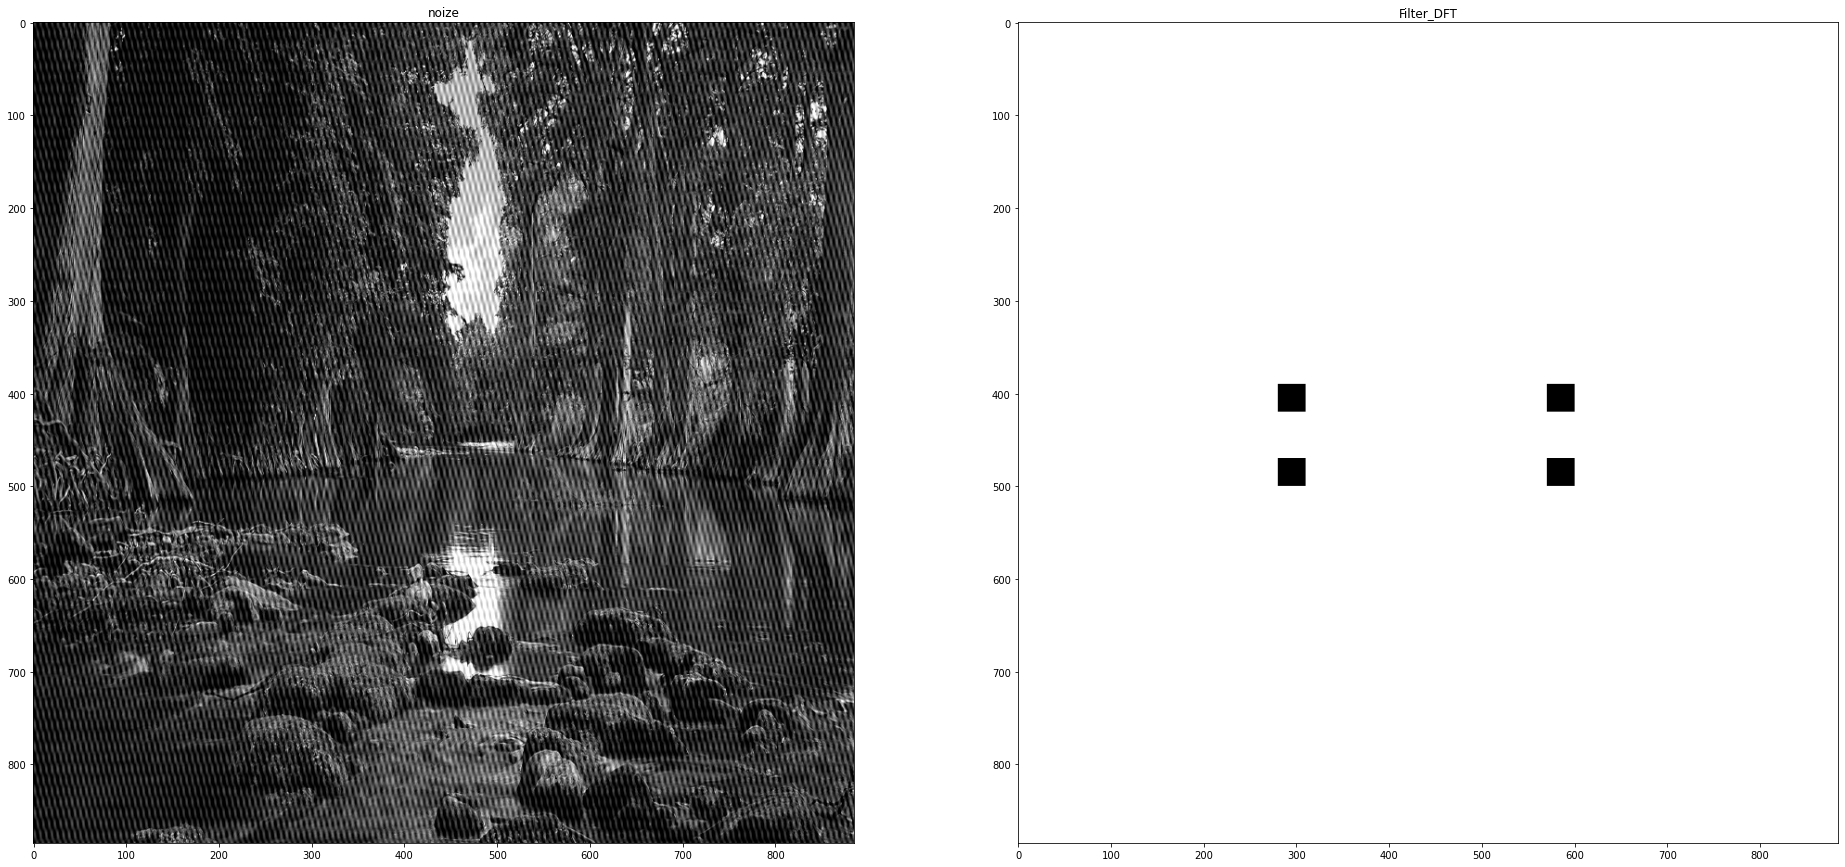

In [150]:
plt.figure(figsize=(50, 50))
plt.subplot(1,3,1),plt.imshow(img, cmap=plt.cm.gray),plt.title('noize')
plt.subplot(1,3,2),plt.imshow(Filter_DFT, cmap=plt.cm.gray),plt.title('Filter_DFT')
#plt.subplot(1,3,3),plt.imshow(inverse_DFT, cmap=plt.cm.gray),plt.title('output')
plt.show()

In [97]:
print('ssim:',ssim(img_real ,inverse_DFT))
print('psnr:',psnr(img_real ,inverse_DFT))
print('mse:',mse(img_real ,inverse_DFT))

ssim: 0.8514997189984962
psnr: 30.154587753918733
mse: 62.751135003999046


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/skimage/metrics/_structural_similarity.py:177: ComplexWarning: Casting complex values to real discards the imaginary part
  im2 = im2.astype(np.float64)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: ComplexWarning: Casting complex values to real discards the imaginary part
  ret = umr_sum(arr, axis, dtype, out, keepdims)




# Q4





128
ssim: 0.37923257901865903
psnr: 21.304527635133958
mse: 481.53470993042004


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.


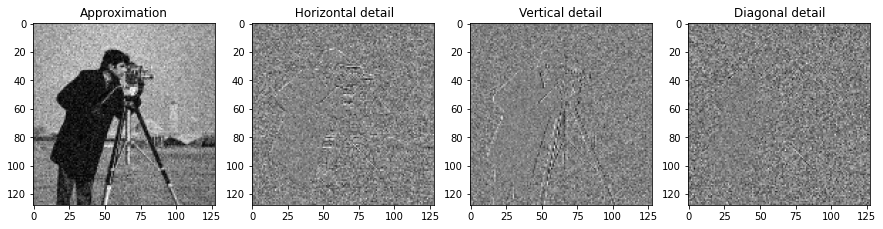

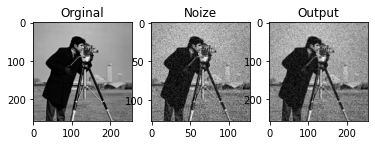

In [109]:
num=1

Original=cv2.imread('2.bmp',cv2.IMREAD_GRAYSCALE)
img=cv2.imread('3.bmp',cv2.IMREAD_GRAYSCALE)
titles = ['Approximation', ' Horizontal detail','Vertical detail', 'Diagonal detail']
LHarray=[]
HLarray=[]
HHarray=[]

coeffs2 = pywt.dwt2(img, 'haar')
LL, (LH, HL, HH) = coeffs2
plt.figure(figsize=(15,15))
      
for n, a in enumerate([LL, LH, HL, HH]):
  plt.subplot(1,4,n+1),plt.imshow(a, cmap=plt.cm.gray),plt.title(titles[n])
  img=LL
  LHarray.append(LH)
  HLarray.append(HL)
  HHarray.append(HH)


s=np.zeros([HHarray[0].shape[0], HHarray[0].shape[1]])
a=(img, (s, s,s))
a=pywt.idwt2(a, 'haar')

img_idwt=a
plt.figure()
plt.subplot(1,3,1),plt.imshow(Original, cmap=plt.cm.gray),plt.title('Orginal')
plt.subplot(1,3,2),plt.imshow(img, cmap=plt.cm.gray),plt.title('Noize')
plt.subplot(1,3,3),plt.imshow(img_idwt, cmap=plt.cm.gray),plt.title('Output')


print('ssim:',ssim(Original ,img_idwt))
print('psnr:',psnr(Original ,img_idwt))
print('mse:',mse(Original ,img_idwt))
